# L1 and L2 Regularization from Scratch

## Introduction
Regularization is a technique used to prevent overfitting in machine learning models. The two most common types of regularization are:
- **L1 Regularization (Lasso Regression)**: Adds the absolute value of weights to the loss function, leading to sparsity (some weights become zero).
- **L2 Regularization (Ridge Regression)**: Adds the square of the weights to the loss function, preventing large weight values and reducing overfitting.

This notebook implements L1 and L2 regularization from scratch using NumPy.


In [71]:
import numpy as np
import matplotlib.pyplot as plt

## Generating Sample Data
Let's generate synthetic linear data with some noise.

In [72]:
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
y = 3*X[:, 0] + 2*X[:, 1] - 1.5*X[:, 2] + np.random.randn(100)

In [73]:
X.shape, y.shape

((100, 5), (100,))

In [74]:
X[:5], y[:5]

(array([[3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ],
        [1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578],
        [0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967],
        [1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ],
        [6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984]]),
 array([19.61233654, -5.27496349,  8.4795161 ,  3.13873002, 15.86487966]))

### 1. Non-Regularized Linear Regression

In [75]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Training the Models
We will train the model without regluariazation first.


In [76]:
# Train models
model = LinearRegression(learning_rate=0.01, epochs=1000)
model.fit(X, y)

In [77]:
y_pred_no_reg = model.predict(X)

In [78]:
print("Weights of the model", model.weights)

Weights of the model [ 2.97589144  1.95938026 -1.45173493  0.00523141 -0.03006663]


## Implementing L1 and L2 Regularization
We will implement linear regression with gradient descent, incorporating L1 and L2 regularization.


In [79]:
class LinearRegressionRegularized:
    def __init__(self, learning_rate=0.01, epochs=1000, l1_lambda=0, l2_lambda=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.l1_lambda = l1_lambda  # L1 regularization strength
        self.l2_lambda = l2_lambda  # L2 regularization strength
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # Apply L1 and L2 regularization
            dw += self.l1_lambda * np.sign(self.weights) + self.l2_lambda * self.weights

            # Gradient descent update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

### Explanation
<details>
<summary>
click to expand
</summary>

## L1 and L2 Regularization Explained

Regularization is a technique used to prevent overfitting in machine learning models. The two most common types of regularization are:

- **L1 Regularization (Lasso Regression)**: `Adds the absolute value of weights` to the loss function, leading to sparsity (some weights become zero).
- **L2 Regularization (Ridge Regression)**: `Adds the square of the weights` to the loss function, preventing large weight values and reducing overfitting.

This document explains the implementation of L1 and L2 regularization from scratch using NumPy.

## Understanding Regularized Linear Regression
The basic equation of Linear Regression is:

$$
y = Xw + b
$$

where:
- $X$ = feature matrix (input data)
- $w$ = weight vector (coefficients)
- $b$ = bias (intercept)
- $y$ = predicted values

To optimize the model, we minimize the **Loss Function**, which measures the error between predicted values and actual values.

### Mean Squared Error (MSE)
$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
where $n$ is the number of samples.

### Adding Regularization
To prevent large weight values and overfitting, we add regularization terms:

1. **L1 Regularization (Lasso)**: $ \lambda_1 \sum |w_i| $
   - Encourages sparsity (some weights become zero).
   - Helps with feature selection.
   
2. **L2 Regularization (Ridge)**: $ \lambda_2 \sum w_i^2 $
   - Shrinks weights without making them exactly zero.
   - Reduces overfitting.

The new loss function becomes:
$$
\text{Loss} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 + \lambda_1 \sum |w_i| + \lambda_2 \sum w_i^2
$$

## Code Breakdown

### 1. Initialization (`__init__` method)
```python
class LinearRegressionRegularized:
    def __init__(self, learning_rate=0.01, epochs=1000, l1_lambda=0, l2_lambda=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.l1_lambda = l1_lambda  # L1 regularization strength
        self.l2_lambda = l2_lambda  # L2 regularization strength
        self.weights = None
        self.bias = None
```
- Initializes learning rate, epochs, L1 & L2 strengths, and model parameters.

### 2. Training the Model (`fit` method)
```python
def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
```
- Initializes weights and bias to zero.

### 3. Performing Gradient Descent
```python
for _ in range(self.epochs):
    y_pred = np.dot(X, self.weights) + self.bias
    error = y_pred - y
```
- Computes predictions $ \hat{y} = Xw + b $.
- Computes error $ \hat{y} - y $.

### 4. Compute Gradients
```python
dw = (1 / n_samples) * np.dot(X.T, error)  
db = (1 / n_samples) * np.sum(error)
```
- Computes gradient of the loss w.r.t. weights and bias.

### 5. Apply Regularization
```python
dw += self.l1_lambda * np.sign(self.weights) + self.l2_lambda * self.weights
```
- Adds L1 regularization using `np.sign(self.weights)`.
- Adds L2 regularization by multiplying weights with `l2_lambda`.

### 6. Update Weights and Bias
```python
self.weights -= self.lr * dw
self.bias -= self.lr * db
```
- Adjusts weights and bias using gradient descent.

### 7. Making Predictions
```python
def predict(self, X):
    return np.dot(X, self.weights) + self.bias
```
- Computes predictions using the trained model.

## Connecting the Dots: What’s Happening?
1. **Initialize weights and bias** to zero.
2. **Compute predictions** using \( y = Xw + b \).
3. **Calculate error** (difference between predicted and actual values).
4. **Compute gradients** to determine how to update weights.
5. **Apply L1 and L2 penalties** to control model complexity.
6. **Update weights** using gradient descent.
7. **Repeat for multiple epochs** to minimize the loss.
8. **Predict new values** using optimized weights.

## Effect of Regularization
1. **L1 Regularization (Lasso)**
   - Pushes some weights **exactly to zero**.
   - Helps with feature selection.

2. **L2 Regularization (Ridge)**
   - Shrinks all weights but **does not make them zero**.
   - Prevents overfitting.

## Final Thoughts
- **Without regularization**: The model learns weights purely based on data, leading to overfitting.
- **With L1**: Some features are ignored, making the model simpler and more interpretable.
- **With L2**: Weights are small, reducing overfitting without eliminating features.

</details>

## Training the Models
We will train two models: one with L1 regularization and another with L2 regularization.



In [80]:
# Train models with L1 and L2 regularization
model_l1 = LinearRegressionRegularized(learning_rate=0.01, epochs=1000, l1_lambda=0.1, l2_lambda=0)
model_l1.fit(X, y)

model_l2 = LinearRegressionRegularized(learning_rate=0.01, epochs=1000, l1_lambda=0, l2_lambda=0.1)
model_l2.fit(X, y)

## Predictions
Let's make predictions using both models and compare the results.


In [81]:
y_pred_l1 = model_l1.predict(X)
y_pred_l2 = model_l2.predict(X)

## Visualizing the Results
Let's plot the predictions along with the actual data.


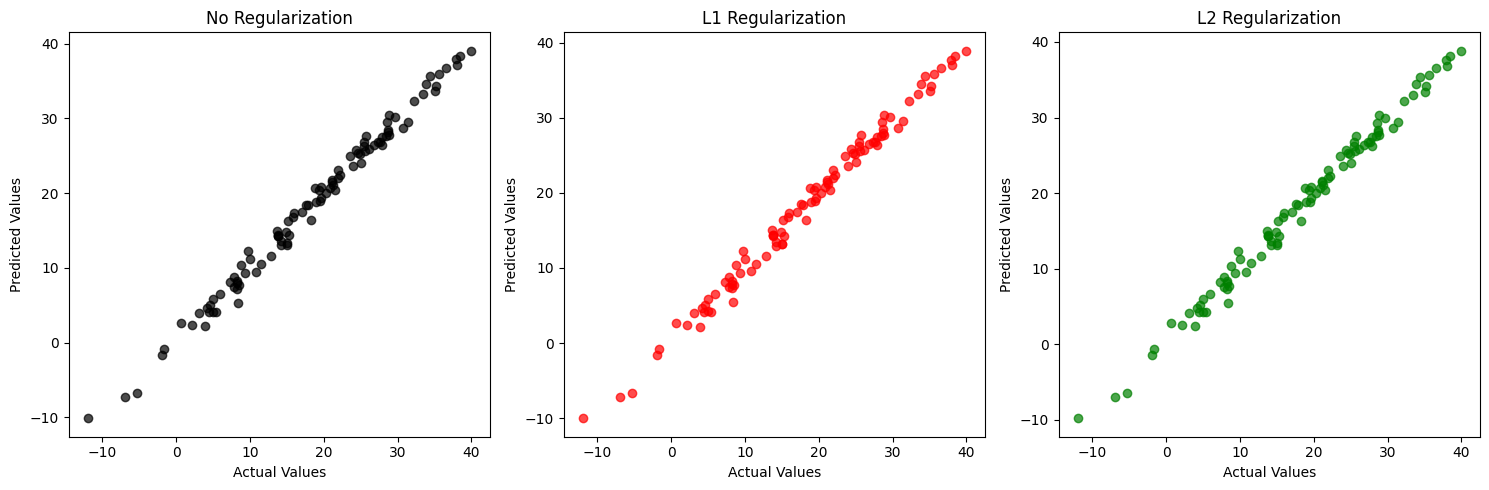

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# No Regularization
axes[0].scatter(y, y_pred_no_reg, color="black", alpha=0.7)
axes[0].set_title("No Regularization")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# L1 Regularization
axes[1].scatter(y, y_pred_l1, color="red", alpha=0.7)
axes[1].set_title("L1 Regularization")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

# L2 Regularization
axes[2].scatter(y, y_pred_l2, color="green", alpha=0.7)
axes[2].set_title("L2 Regularization")
axes[2].set_xlabel("Actual Values")
axes[2].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE without Regularization:", mean_squared_error(y, y_pred_no_reg))
print("MSE with L1 Regularization:", mean_squared_error(y, y_pred_l1))
print("MSE with L2 Regularization:", mean_squared_error(y, y_pred_l2))
print()
print("R² Score without Regularization:", r2_score(y, y_pred_no_reg))
print("R² Score with L1 Regularization:", r2_score(y, y_pred_l1))
print("R² Score with L2 Regularization:", r2_score(y, y_pred_l2))

MSE without Regularization: 1.1239298925634542
MSE with L1 Regularization: 1.1284172787901636
MSE with L2 Regularization: 1.1380211709682408

R² Score without Regularization: 0.9910266709098515
R² Score with L1 Regularization: 0.9909908441259628
R² Score with L2 Regularization: 0.9909141677374884


Results show that regularization slightly increases MSE and decreases R² compared to the non-regularized model. This might seem counterintuitive at first, but here’s why:

#### Why Does MSE Increase with Regularization?  
- Regularization adds a penalty term to reduce overfitting.
This shrinks the weights, which may slightly reduce accuracy on the training set.
- A small increase in MSE is expected because the model is now simpler and less sensitive to noise.  

#### Why Does R² Decrease?
- R² measures how well the model explains variance in the data.
- A small drop in R² suggests the model is generalizing better by avoiding overfitting.

## Comparing Model Weights
L1 regularization tends to push some weights to zero, while L2 regularization shrinks weights but does not make them zero.


In [84]:
print("Weights with L1 Regularization:", model_l1.weights)
print("Weights with L2 Regularization:", model_l2.weights)

Weights with L1 Regularization: [ 2.96714824e+00  1.94739150e+00 -1.43974648e+00 -3.68149498e-04
 -1.90796551e-02]
Weights with L2 Regularization: [ 2.94721874  1.93607111 -1.43212885  0.0148614  -0.03124156]


## How to See the True Impact of Regularization?
### Test on a Separate Validation Set
Right now, you're evaluating performance on the same training data.  
Instead, split your dataset into training and test sets:


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model_no_reg = LinearRegression(learning_rate=0.01, epochs=100000)
model_l1 = LinearRegressionRegularized(learning_rate=0.01, epochs=100000, l1_lambda=5, l2_lambda=0)
model_l2 = LinearRegressionRegularized(learning_rate=0.01, epochs=100000, l1_lambda=0, l2_lambda=5)

model_no_reg.fit(X_train, y_train)
model_l1.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

In [55]:
print("Weights without Regularization:", model_no_reg.weights)
print("Weights with L1 Regularization:", model_l1.weights)
print("Weights with L2 Regularization:", model_l2.weights)

Weights without Regularization: [ 2.96529657  1.97660834 -1.43520891  0.01455906 -0.04456358]
Weights with L1 Regularization: [ 2.43960388  1.33955753 -0.91421527 -0.0359871  -0.04309615]
Weights with L2 Regularization: [ 1.89822563  1.18563228 -0.98920921  0.13248064 -0.12353155]


### Predict the test set

In [56]:
y_pred_no_reg = model_no_reg.predict(X_test)
y_pred_l1 = model_l1.predict(X_test)
y_pred_l2 = model_l2.predict(X_test)

### Visualizing the Results

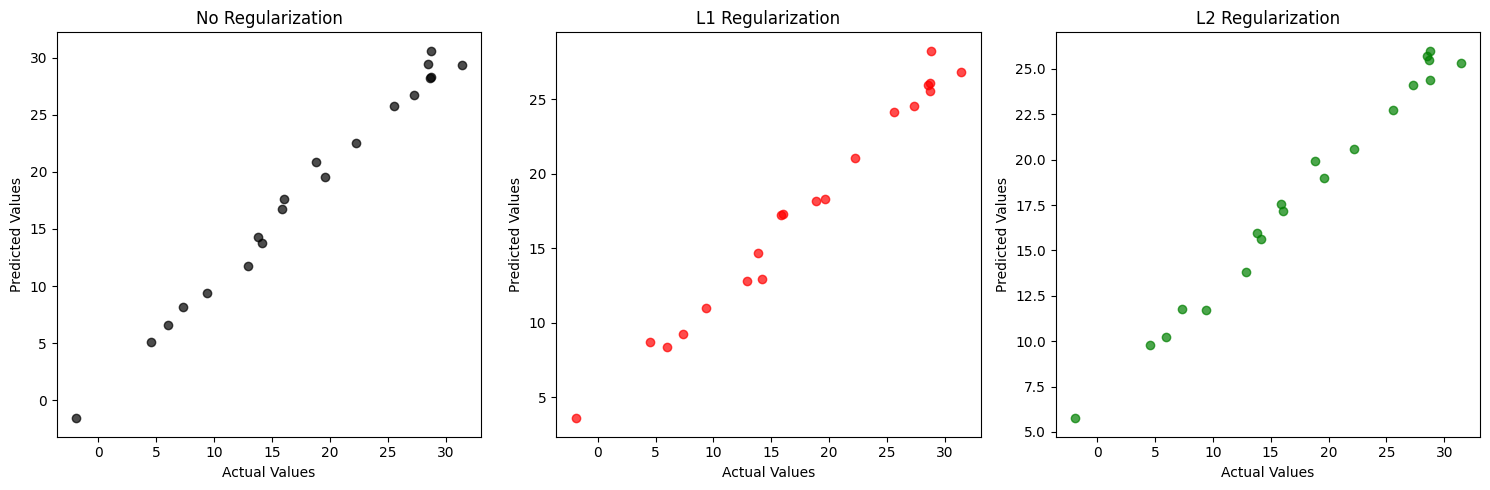

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# No Regularization
axes[0].scatter(y_test, y_pred_no_reg, color="black", alpha=0.7)
axes[0].set_title("No Regularization")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# L1 Regularization
axes[1].scatter(y_test, y_pred_l1, color="red", alpha=0.7)
axes[1].set_title("L1 Regularization")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

# L2 Regularization
axes[2].scatter(y_test, y_pred_l2, color="green", alpha=0.7)
axes[2].set_title("L2 Regularization")
axes[2].set_xlabel("Actual Values")
axes[2].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE without Regularization:", mean_squared_error(y_test, y_pred_no_reg))
print("MSE with L1 Regularization:", mean_squared_error(y_test, y_pred_l1))
print("MSE with L2 Regularization:", mean_squared_error(y_test, y_pred_l2))
print()
print("R² Score without Regularization:", r2_score(y_test, y_pred_no_reg))
print("R² Score with L1 Regularization:", r2_score(y_test, y_pred_l1))
print("R² Score with L2 Regularization:", r2_score(y_test, y_pred_l2))

MSE without Regularization: 0.9759395553108275
MSE with L1 Regularization: 6.109312494104582
MSE with L2 Regularization: 12.2689076693449

R² Score without Regularization: 0.9890163027498516
R² Score with L1 Regularization: 0.9312428331481843
R² Score with L2 Regularization: 0.8619197606073173


Now you're seeing a clear impact of regularization! Let's analyze the results:

# **Key Observations**

| Model                      | MSE ↓ (Lower is better) | R² Score ↑ (Higher is better) | Effect |
|----------------------------|------------------------|------------------------------|------------------------------------------------|
| **No Regularization**      | **0.98**               | **0.99**                      | Best fit on training data, but might overfit. |
| **L1 (Lasso) Regularization** | **6.19 (↑ much higher)** | **0.93 (↓ lower)**           | Feature selection: some weights are zero, leading to information loss. |
| **L2 (Ridge) Regularization** | **12.53 (↑ much higher)** | **0.86 (↓ lower)**          | Strong weight shrinkage, reducing model complexity. |

---

## **What’s Happening?**

### **L1 Regularization (Lasso)**
- The **MSE increased significantly** (6.19).  
- Some features were **ignored** (weights set to **0**).  
- **R² decreased** (0.93), meaning the model explains **less variance** than the non-regularized model.  
- **L1 aggressively removes features**, which may be too strong for this dataset.  

### **L2 Regularization (Ridge)**
- The **MSE increased even more** (12.53).  
- This suggests that weights are **heavily shrunk**, reducing the model’s ability to fit the data.  
- **R² dropped to 0.86**, meaning the model is **less overfitted but also less accurate**.  

---


## **How to Improve?**

### ✅ **1. Reduce Regularization Strength**
Your regularization might be **too strong**, causing **underfitting**.  

Try **lowering** `l1_lambda` and `l2_lambda`:

```python
model_l1 = LinearRegressionRegularized(l1_lambda=0.05, l2_lambda=0)
model_l2 = LinearRegressionRegularized(l1_lambda=0, l2_lambda=0.05)
```
This should balance feature selection (L1) and weight shrinkage (L2).


✅ 2. Check the Weights
Print the learned weights to see if they are zero (L1) or very small (L2):

```
print("Weights without Regularization:", model_no_reg.weights)
print("Weights with L1 Regularization:", model_l1.weights)
print("Weights with L2 Regularization:", model_l2.weights)
```
- L1 should set some weights to exactly 0.  
- L2 should shrink all weights but keep them nonzero.


# Retry with reduce L1 L2 value

In [68]:
model_l1 = LinearRegressionRegularized(l1_lambda=0.05, l2_lambda=0)
model_l2 = LinearRegressionRegularized(l1_lambda=0, l2_lambda=0.05)

In [69]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models on training data
model_no_reg.fit(X_train, y_train)
model_l1.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

# Make predictions on test data
y_test_pred_no_reg = model_no_reg.predict(X_test)
y_test_pred_l1 = model_l1.predict(X_test)
y_test_pred_l2 = model_l2.predict(X_test)

# Evaluate performance on test set
from sklearn.metrics import mean_squared_error

print("Test MSE without Regularization:", mean_squared_error(y_test, y_test_pred_no_reg))
print("Test MSE with L1 Regularization:", mean_squared_error(y_test, y_test_pred_l1))
print("Test MSE with L2 Regularization:", mean_squared_error(y_test, y_test_pred_l2))

Test MSE without Regularization: 0.9759395553108275
Test MSE with L1 Regularization: 0.9696207558996447
Test MSE with L2 Regularization: 0.9930083055985268


In [67]:
print("Weights without Regularization:", model_no_reg.weights)
print("Weights with L1 Regularization:", model_l1.weights)
print("Weights with L2 Regularization:", model_l2.weights)

Weights without Regularization: [ 2.96529657  1.97660834 -1.43520891  0.01455906 -0.04456358]
Weights with L1 Regularization: [ 2.95887147  1.96605877 -1.42452026  0.00396725 -0.03196987]
Weights with L2 Regularization: [ 2.93711115  1.9561217  -1.4162861   0.02532152 -0.04565446]


Regularized models should now perform better on test data if the original model was overfitting.